# prediction of the red wine quality is good or bad uing various relevant features provided in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

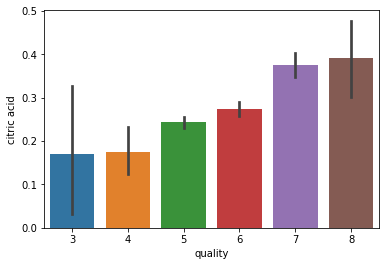

In [8]:
sns.barplot(x='quality',y='citric acid',data=df)

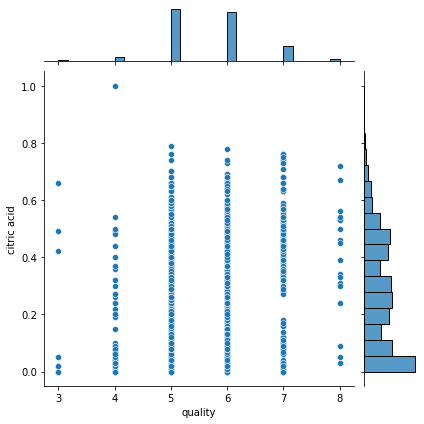

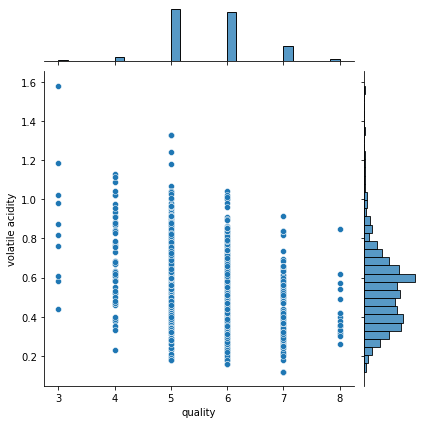

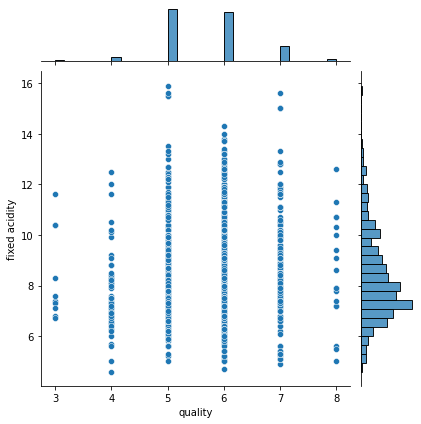

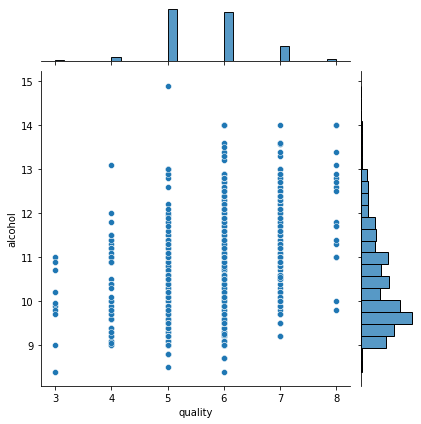

In [9]:
d1 = sns.jointplot(data=df, x='quality', y='citric acid')
d2 = sns.jointplot(data=df, x='quality', y='volatile acidity')
d3 = sns.jointplot(data=df, x='quality', y='fixed acidity')
d4 = sns.jointplot(data=df, x='quality', y='alcohol')

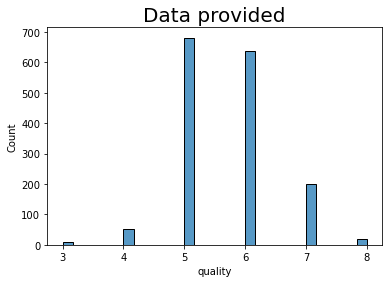

In [10]:
plt.title('Data provided', fontsize=20)
hist1 = sns.histplot(df.quality)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'No of Datapoints per Activity'}, xlabel='quality', ylabel='count'>

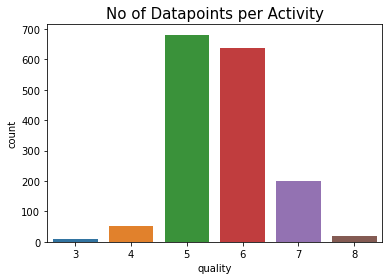

In [11]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.quality)

In above graphs shows the quality ranges is max 5 and 6

In [12]:
correlation = df.corr()

<AxesSubplot:>

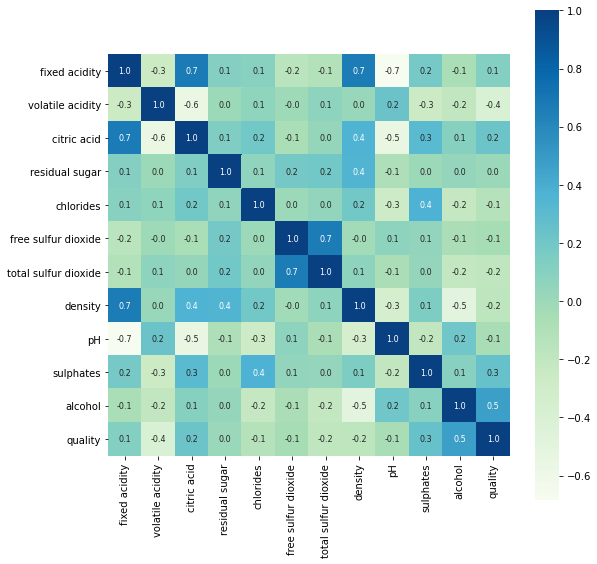

In [13]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'GnBu')

# Using Random Forest Technique

In [14]:
#seperating X and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
#Splitting Into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.3)

# Using Single Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

-0.06991525423728828

# RandomForest Without Hyperparameter tuning

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [19]:
r2_score(y_test,y_pred)

0.2831920903954802

# Hyperparameter tuning

In [20]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators':np.arange(50,251,50),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,10),
    'max_features':np.arange(1,4),
    'min_samples_leaf':np.arange(1,11)
}

In [21]:
estimator = RandomForestClassifier(random_state=0)

In [22]:
rscv = RandomizedSearchCV(estimator,param_distributions,cv=10)

In [23]:
rscv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([1, 2, 3]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])})

In [24]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 9,
 'max_features': 3,
 'max_depth': 9,
 'criterion': 'entropy'}

In [25]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=3,
                       min_samples_leaf=9, n_estimators=200, random_state=0)

# Model Building with Hyperparameter tuning

In [26]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features=1, n_estimators=50)

In [28]:
y_pred = model.predict(X_test)

In [29]:
r2_score(y_test,y_pred)

0.28672316384180785

Using this we are getting very less accuracy 